# Introduction

In [448]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
sns.set_theme(style="darkgrid")
%matplotlib inline

# Data

## Collection

In [449]:
# load data to a pandas dataframe
df = pd.read_csv("dataset/Train.csv")

## Assess

In [450]:
# shape of the data
df.shape

(8523, 12)

In [451]:
# view the content of dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [452]:
# view the data type and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [453]:
# view the statistics of data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [454]:
# check for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [455]:
# check for duplicated values
sum(df.duplicated())

0

## Quality

* Missing values for Item_Weight & Outlet_Size
* Correct the values for Item_Fat_Content
* Label Encoding needs to be done for Categorical Items:
    - Item_Fat_Content
    - Item_Type
    - Outlet_Size
    - Outlet_Location_Type
    - Outlet_Type

## Clean

In [456]:
# creating a copy of a dataframe
df_clean = df.copy()

#### Define

##### Missing values for Item_Weight

We will replace the missing values with the mean of Item_Weight

##### Code

In [457]:
df_clean['Item_Weight'].fillna(df_clean['Item_Weight'].mean(), inplace=True)

##### Test

In [458]:
# check for missing values
df_clean.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Define

##### Missing values for Outlet_Size

We will replace the missing values with the mode of Outlet_Size

##### Code

In [459]:
df_clean['Outlet_Size']= df_clean['Outlet_Size'].fillna(df_clean['Outlet_Size'].mode()[0])

##### Test

In [460]:
# check for missing values
df_clean.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Define

##### Fix values for Item_Fat_Content

We will correct the values for Item_Fat_Content

##### Code

In [461]:
df_clean.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [462]:
df_clean.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [463]:
df_clean.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [464]:
# Saving the dataframe to new_insurance
df_clean.to_csv("dataset/new_train.csv", index=False)

### Since we have completed our data wrangling now we will start with analysis and visualization.

In [465]:
# load our cleaned dataset
df = pd.read_csv('dataset/new_train.csv')

In [466]:
# shape of dataset
df.shape

(8523, 12)

In [467]:
#checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Structure of the dataset

> There are 8523 rows in the dataset with 10 features like identifier, weight, content, and so on. Featues are numeric in the dataset.

### Main feature(s) of interest in the dataset

> We are intreseted in checking the relation of different features with sales.



## Univariate Exploration

### 1. Distribution of Item Weight

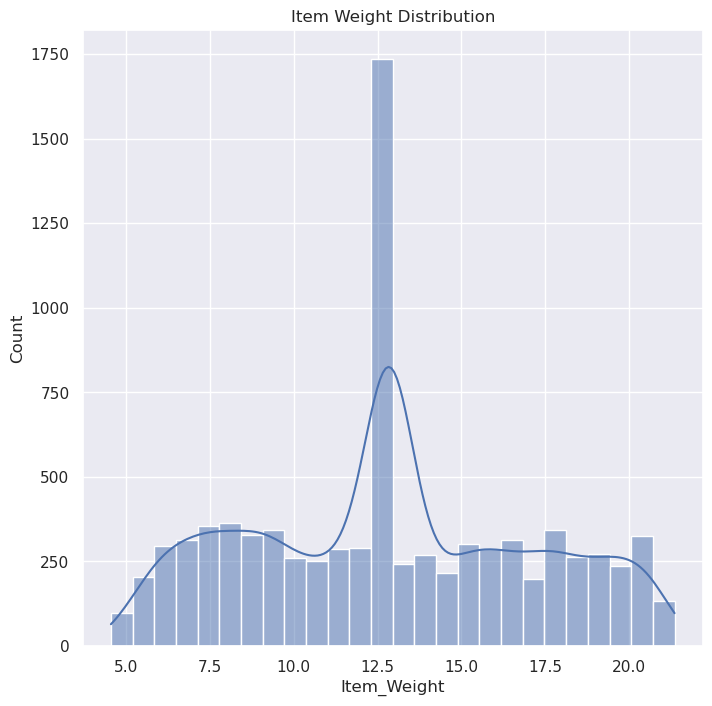

In [468]:
plt.figure(figsize=(8,8))
plt.title("Item Weight Distribution")
sns.histplot(data=df, x='Item_Weight', kde=True, alpha=0.5)
plt.show()

**From the above plot we can observe that a lot of items have a weight of 12.5**

### 2. Distribution of Item Fat Content

In [469]:
# creating a new dataframe
item_fat_content_df = df.groupby('Item_Fat_Content').agg({'Item_Identifier':'count'})

item_fat_content_df['perc'] = (item_fat_content_df['Item_Identifier']/item_fat_content_df['Item_Identifier'].sum())*100

item_fat_content_df

,Item_Identifier,perc
Item_Fat_Content,,
Low Fat,5517,64.730729
Regular,3006,35.269271


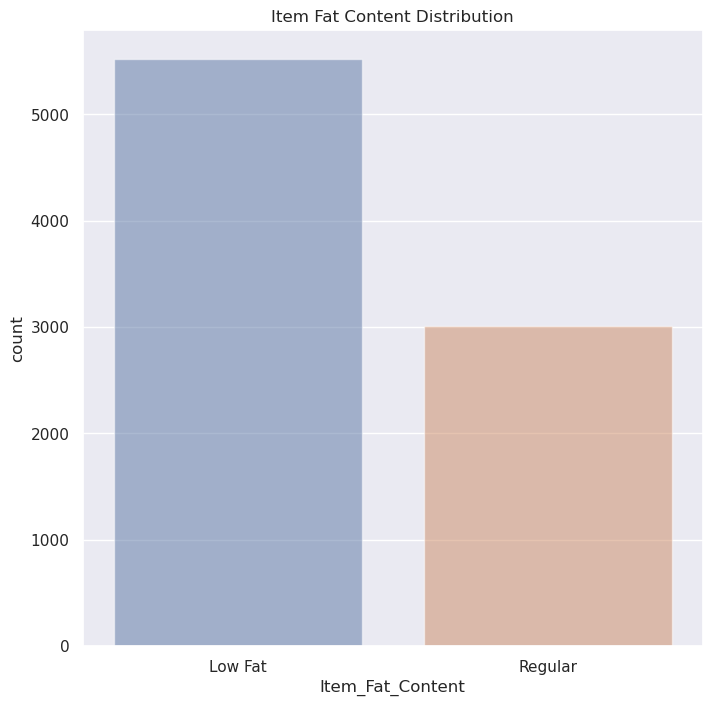

In [470]:
plt.figure(figsize=(8,8))
plt.title("Item Fat Content Distribution")
sns.countplot(data=df, x='Item_Fat_Content', alpha=0.5)
plt.show()

**From the plot we can see that we have more items from low fat category rather than regular**

### 3. Distribution of Item Visibility

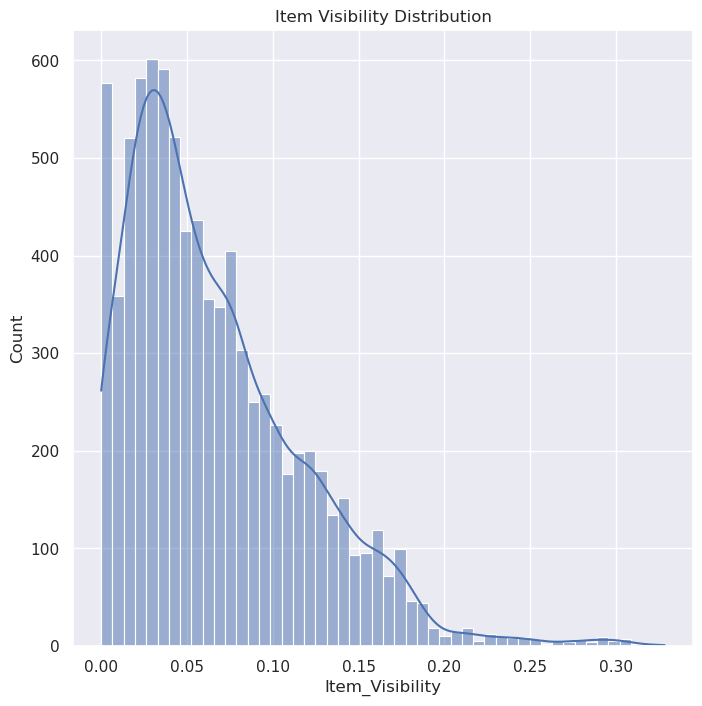

In [471]:
plt.figure(figsize=(8,8))
plt.title("Item Visibility Distribution")
sns.histplot(data=df, x='Item_Visibility', kde=True, alpha=0.5)
plt.show()

**From the plot it is evident that majority of the items have visibility less than 0.20**

### 4. Distribution of Item Type

In [472]:
#creating a new dataframe
item_type_content_df = df.groupby('Item_Type').agg({'Item_Identifier':'count'})

item_type_content_df['perc'] = (item_type_content_df['Item_Identifier']/item_type_content_df['Item_Identifier'].sum())*100

item_type_content_df

,Item_Identifier,perc
Item_Type,,
Baking Goods,648,7.602957
Breads,251,2.944972
Breakfast,110,1.290625
Canned,649,7.614690
Dairy,682,8.001877
Frozen Foods,856,10.043412
Fruits and Vegetables,1232,14.455004
Hard Drinks,214,2.510853
Health and Hygiene,520,6.101138


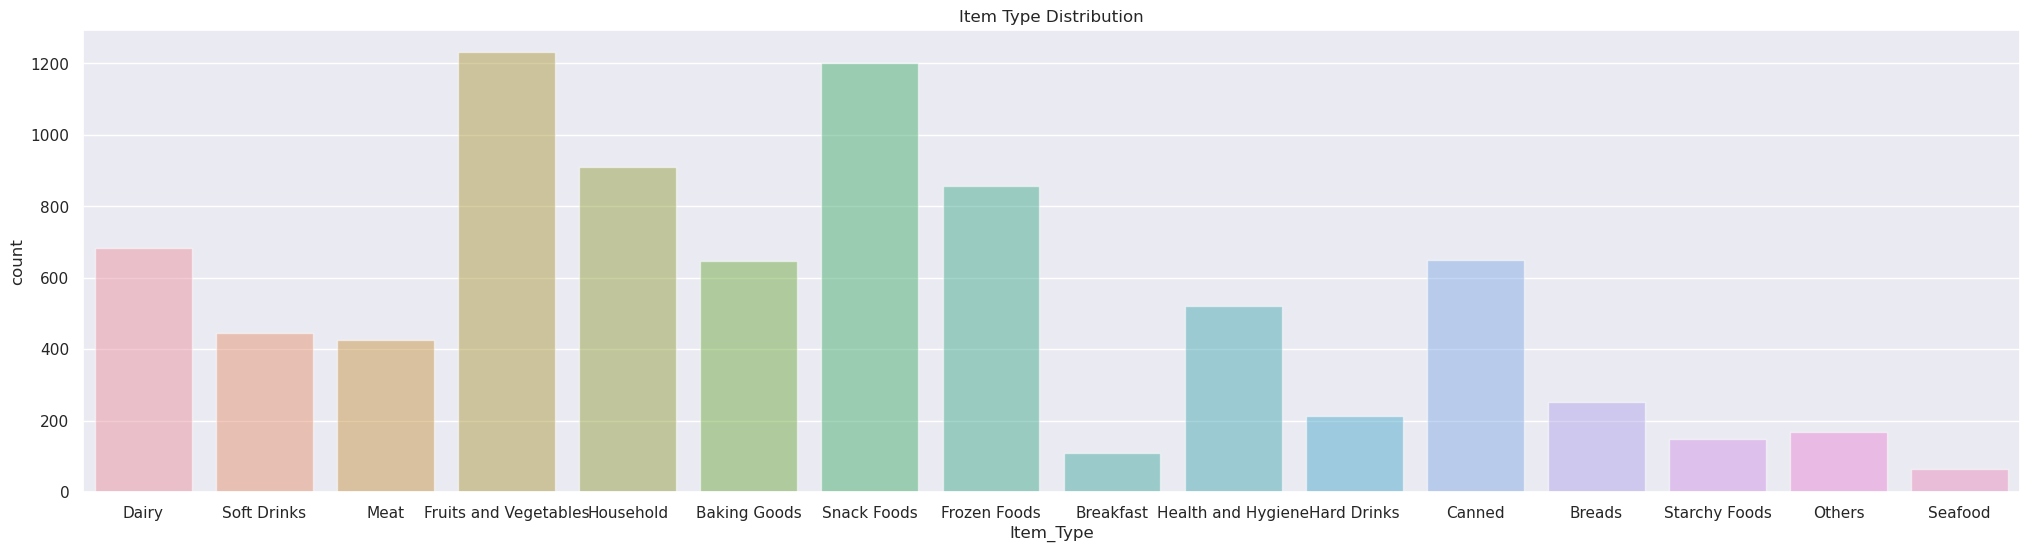

In [473]:
plt.figure(figsize=(25,6))
plt.title("Item Type Distribution")
sns.countplot(data=df, x='Item_Type', alpha=0.5)
plt.show()

**From the plot we can see the distribution of different types of items**

### 5. Distribution of Item MRP

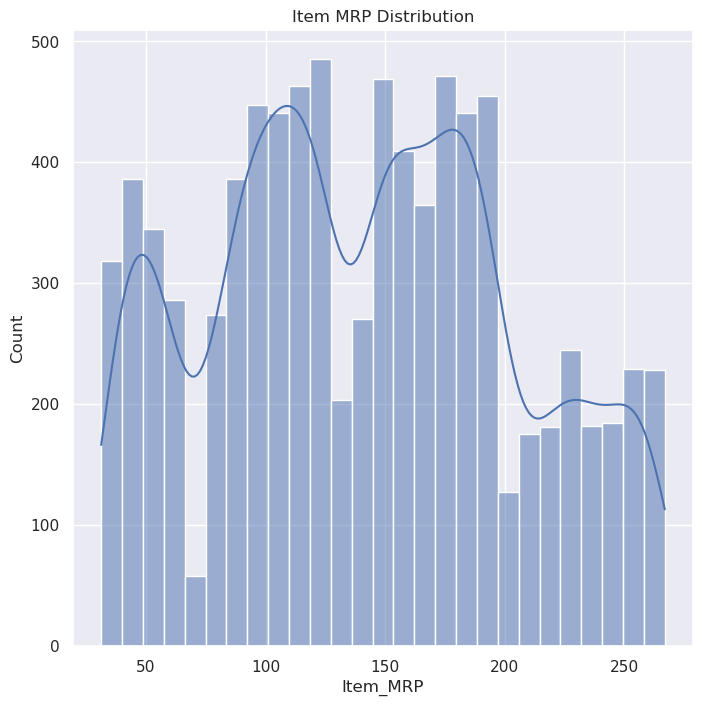

In [474]:
plt.figure(figsize=(8,8))
plt.title("Item MRP Distribution")
sns.histplot(data=df, x='Item_MRP', kde=True, alpha=0.5)
plt.show()

**From the above plot we can see thatmore items have the price of 50, 100 and between 150 to 200.**

### 6. Distribution of Outlet Establishment Year

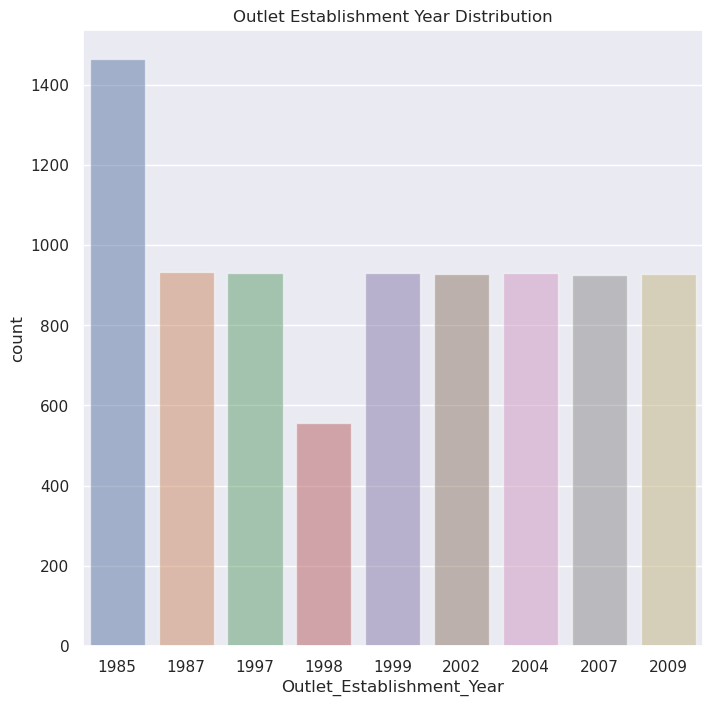

In [475]:
plt.figure(figsize=(8,8))
plt.title("Outlet Establishment Year Distribution")
sns.countplot(data=df, x='Outlet_Establishment_Year', alpha=0.5)
plt.show()

**More than 1400 outlet were established in 1985**

### 7. Distribution of Outlet Size

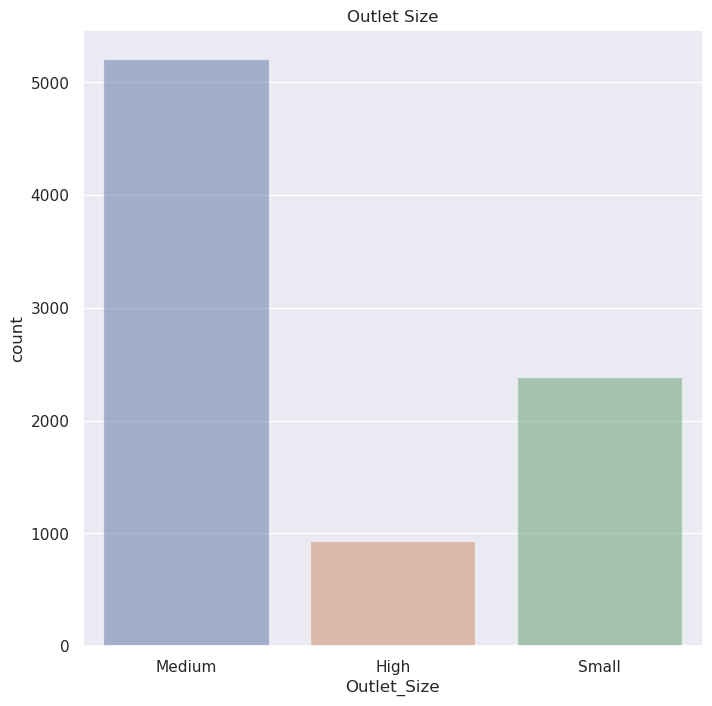

In [476]:
plt.figure(figsize=(8,8))
plt.title("Outlet Size")
sns.countplot(data=df, x='Outlet_Size', alpha=0.5)
plt.show()

**Majority of Outlets are of medium size.**

### 8. Distribution of Outlet Location Type

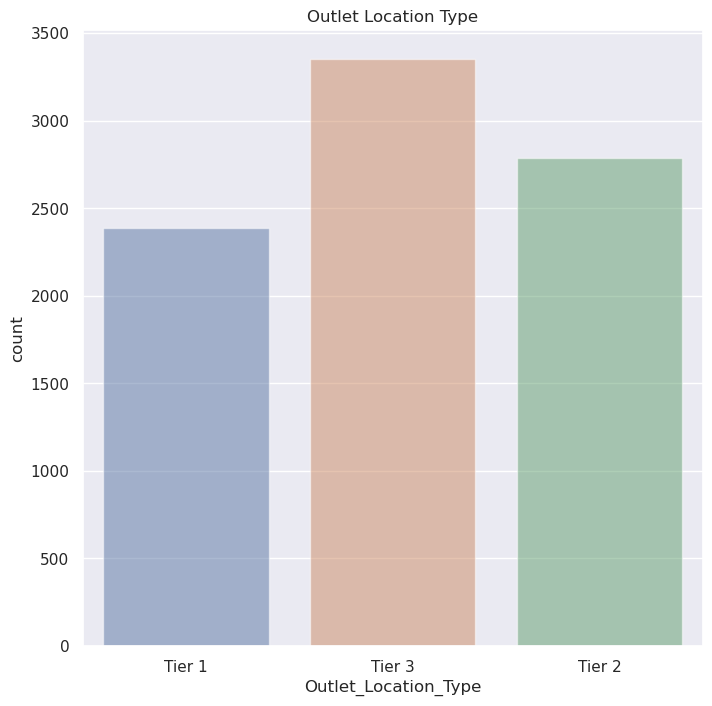

In [477]:
plt.figure(figsize=(8,8))
plt.title("Outlet Location Type")
sns.countplot(data=df, x='Outlet_Location_Type', alpha=0.5)
plt.show()

**Major outlets are in Tier 3 locactions followed by Tier 2 and Tier 1.**

### 9. Distribution of Outlet Type

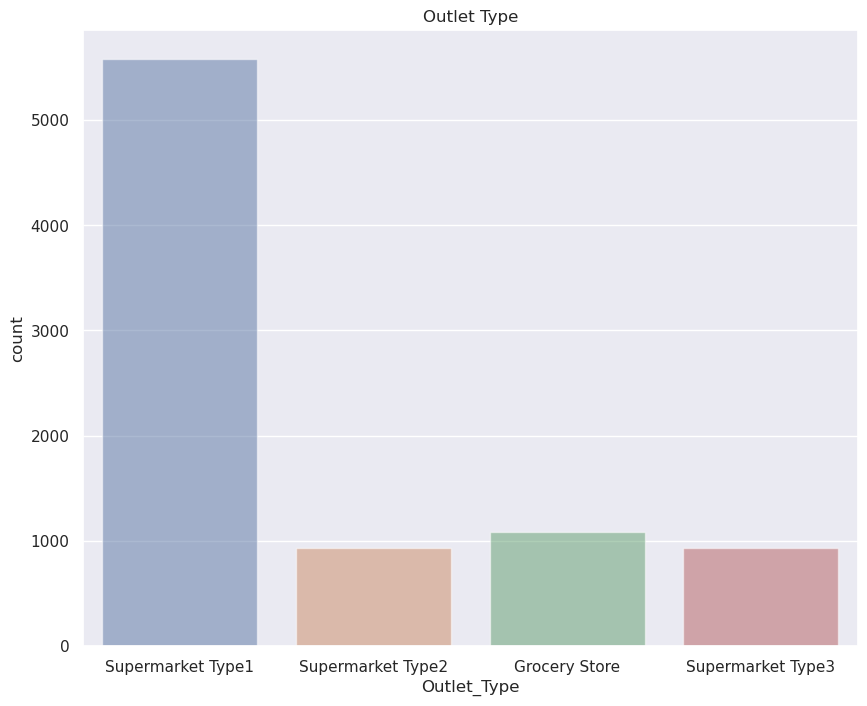

In [478]:
plt.figure(figsize=(10,8))
plt.title("Outlet Type")
sns.countplot(data=df, x='Outlet_Type', alpha=0.5)
plt.show()

**Majority Outlets belong to Supermarket Type 1**

### 10. Sales Distribution

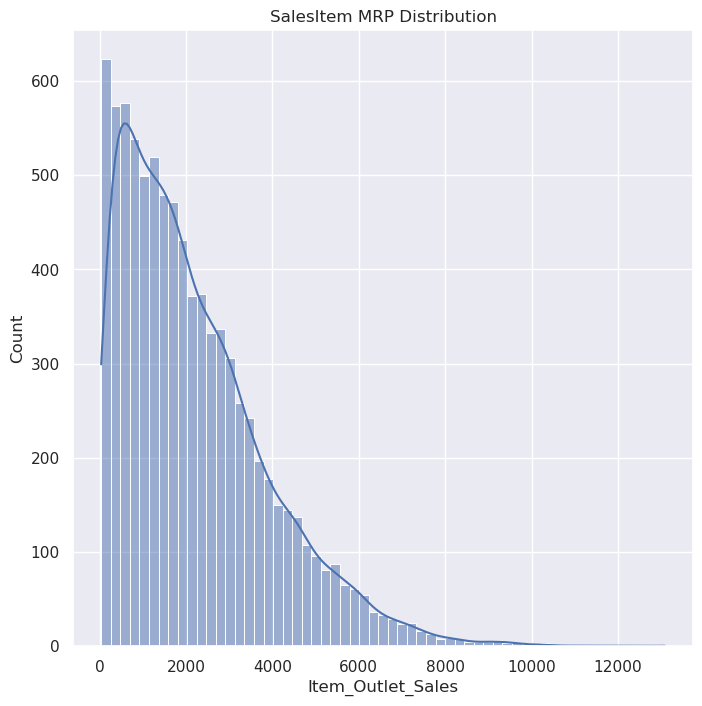

In [479]:
plt.figure(figsize=(8,8))
plt.title("SalesItem MRP Distribution")
sns.histplot(data=df, x='Item_Outlet_Sales', kde=True, alpha=0.5)
plt.show()

**It is evident from plot that sales for most items lies in the range of 0 to 2000 and gradually keeps on dicreasing.**

## Bivariate Exploration

### 11. Item Weight vs Item Sales

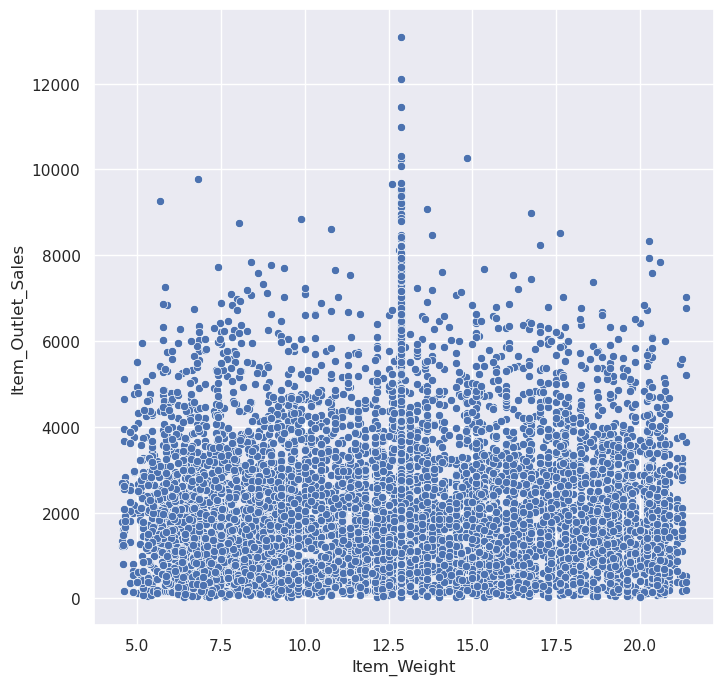

In [480]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x = 'Item_Weight', y='Item_Outlet_Sales')
plt.show()

**Majority sales are for item with weight 12.5**

### 12. Item Fat Content vs Item Sales

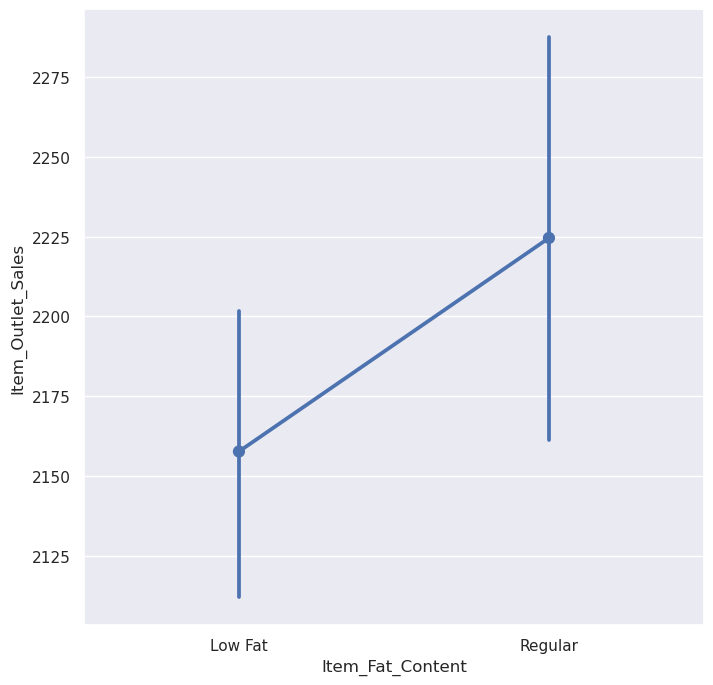

In [481]:
plt.figure(figsize=(8,8))
sns.pointplot(data=df, x = 'Item_Fat_Content', y='Item_Outlet_Sales')
plt.show()

**Sales are higher for regular items.**

### 13. Item Visibility vs Item Sales

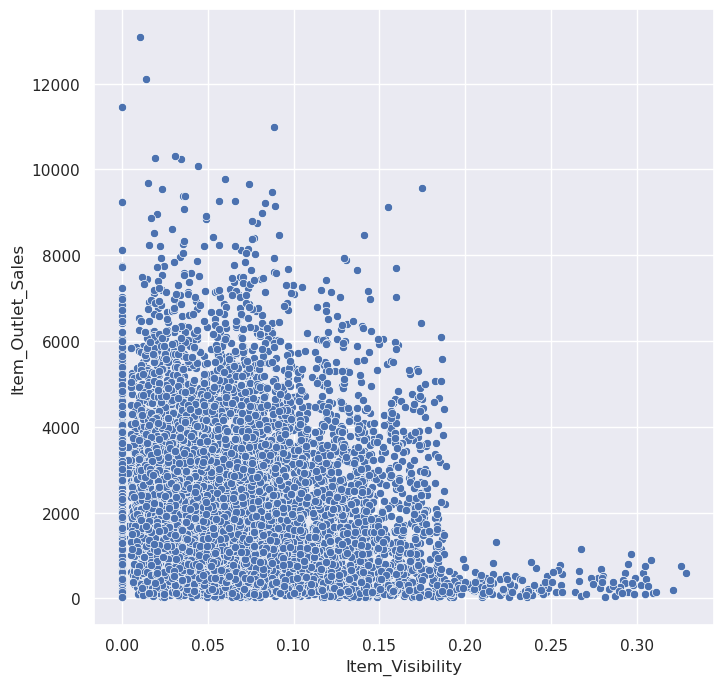

In [482]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x = 'Item_Visibility', y='Item_Outlet_Sales')
plt.show()

**Sales are higher for items with visibility less than 0.2**

### 14. Item Type vs Item Outlet Sales

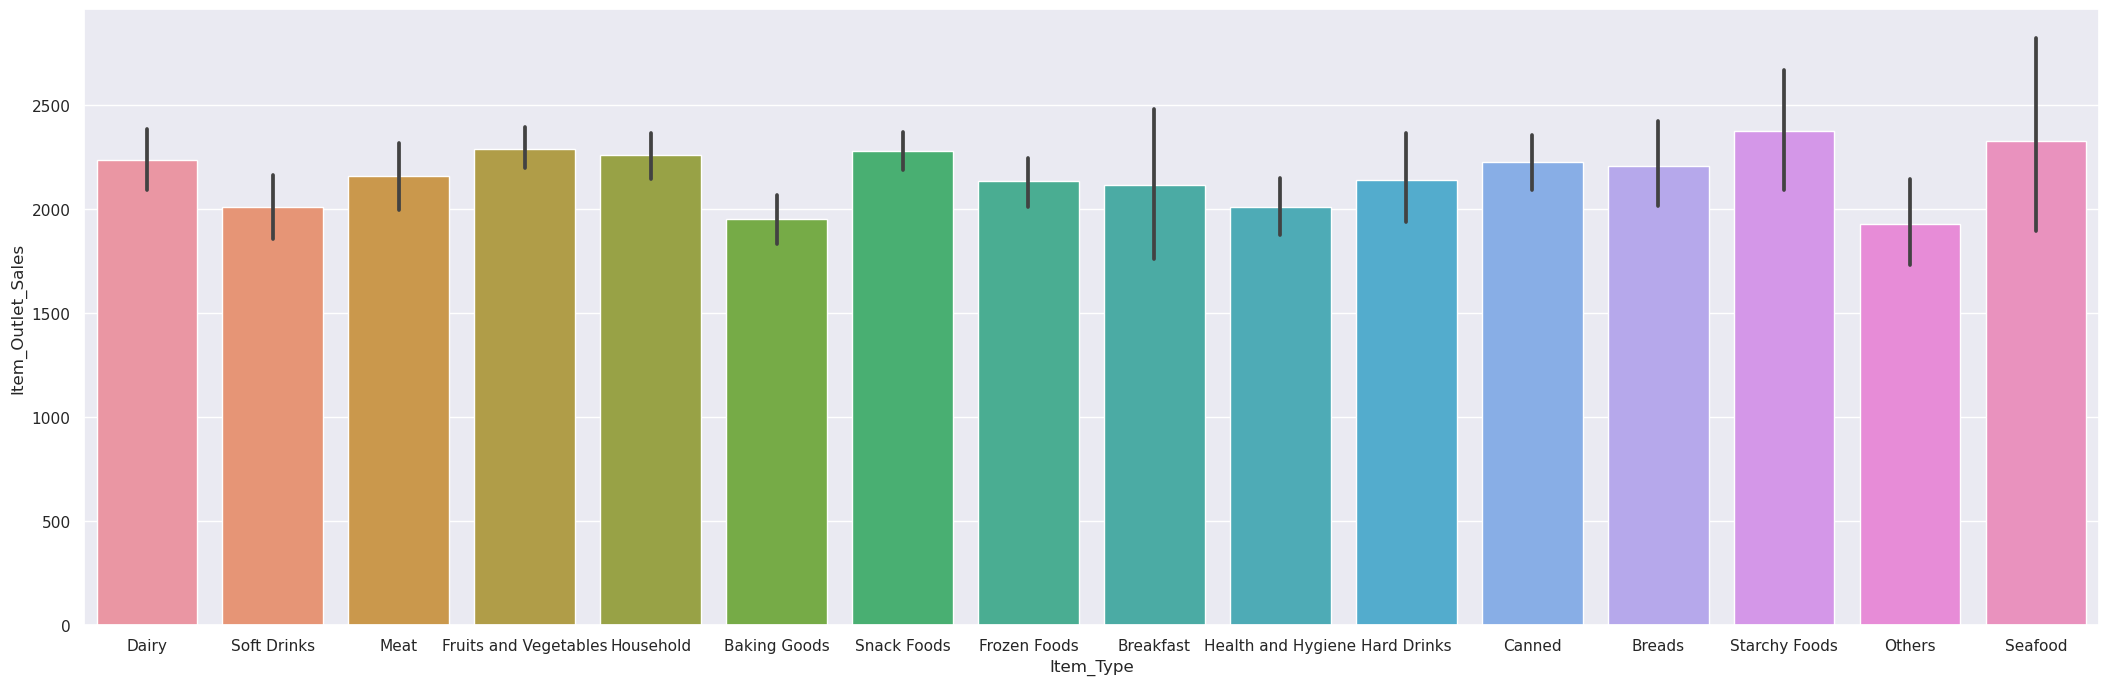

In [483]:
plt.figure(figsize=(26,8))
sns.barplot(data=df, x = 'Item_Type', y='Item_Outlet_Sales')
plt.show()

### 15. Item MRP vs Item Outlet Sales

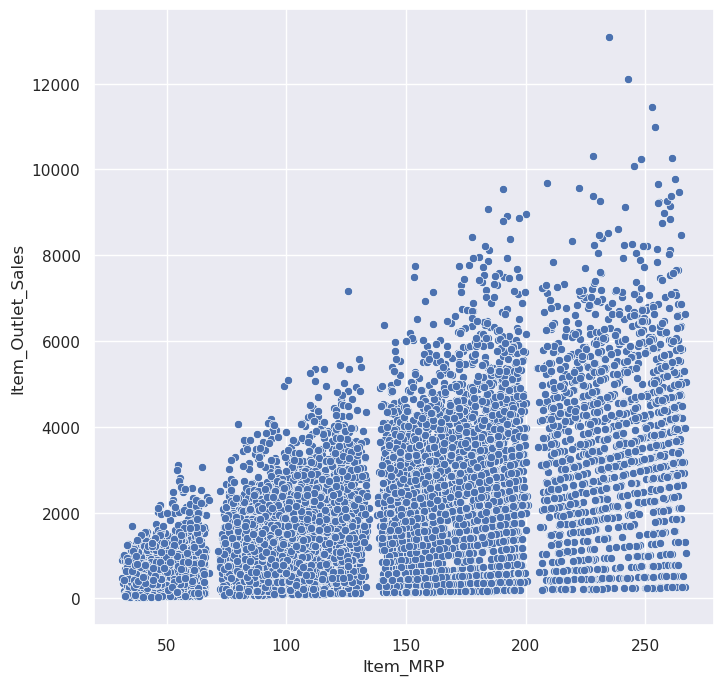

In [484]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x = 'Item_MRP', y='Item_Outlet_Sales')
plt.show()

**We see a linear relationship that as the MRP increases the sales also increases.**

### 16. Outlet Size vs Item Outlet Sales

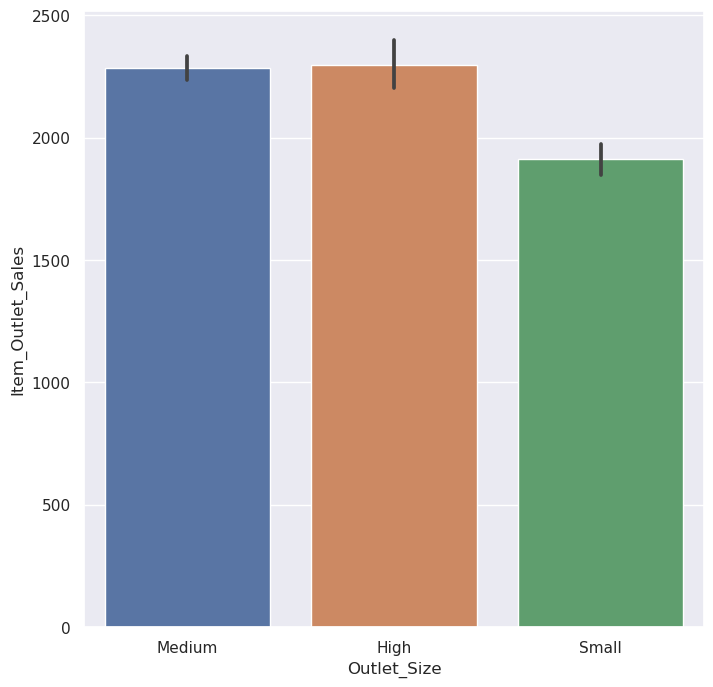

In [485]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x = 'Outlet_Size', y='Item_Outlet_Sales')
plt.show()

**The sales are on higher side if the outlet size is medium or high.**

### 17. Outlet Location Type vs Item Outlet Sales

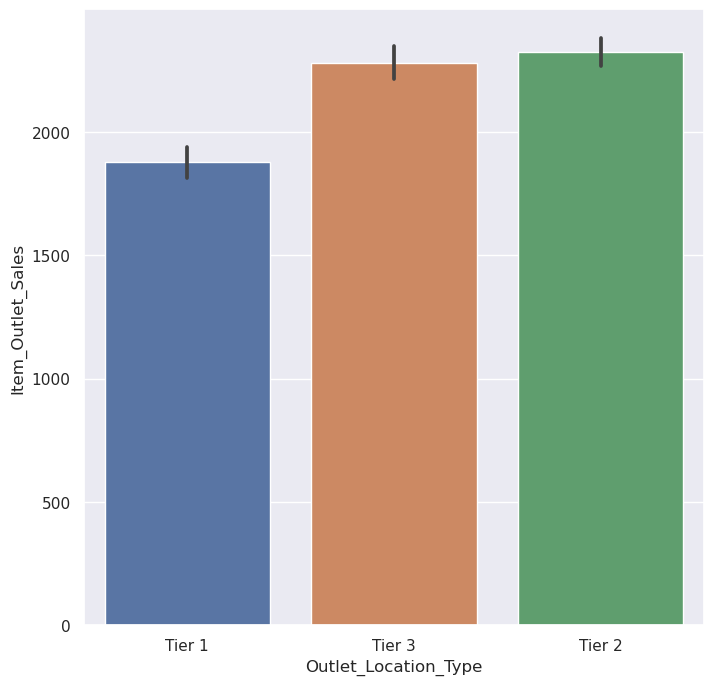

In [486]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x = 'Outlet_Location_Type', y='Item_Outlet_Sales')
plt.show()

**Sales in Tier 2 and Tier 3 are higher as compared to Tier 1**

### 17. Outlet Type vs Item Outlet Sales

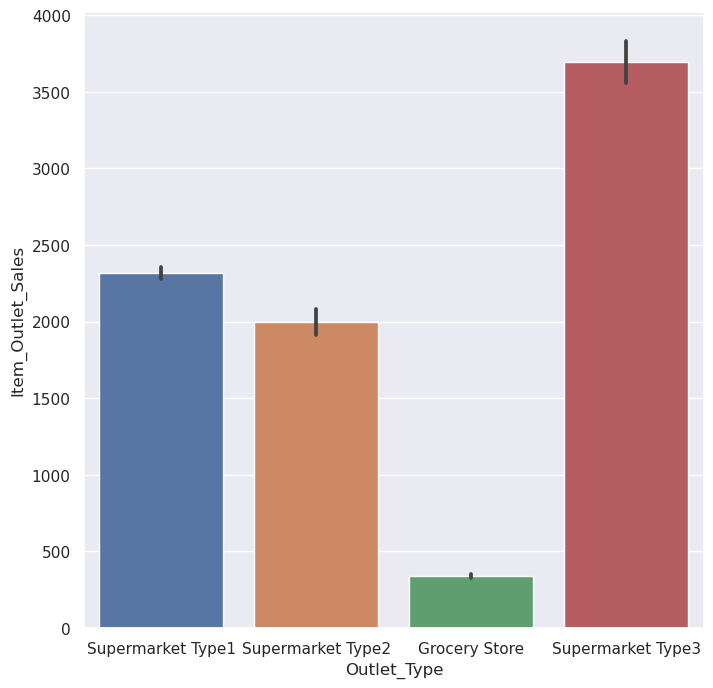

In [487]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x = 'Outlet_Type', y='Item_Outlet_Sales')
plt.show()

**Majority of sales occur for Supermarket Type3 follwed by Type1, Type2 and Grocery Store.**

## Correlation

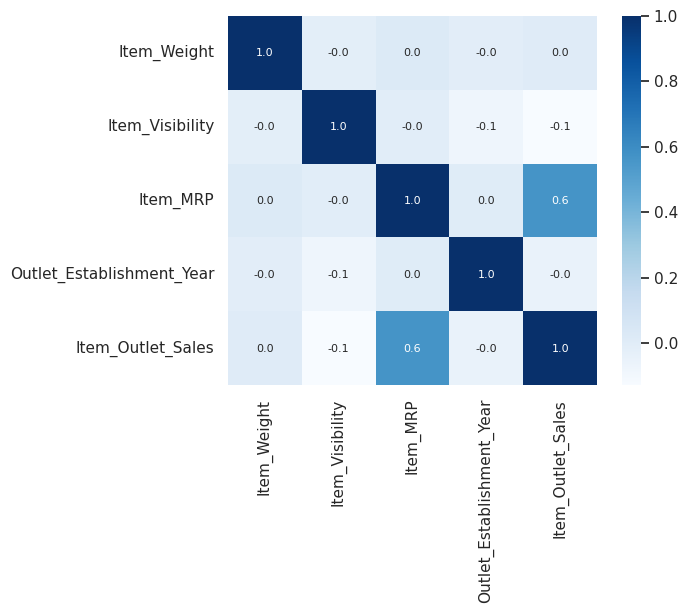

In [488]:
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

**Item MRP is highly correlated with the sales.**

## Preprocessing

#### Define

##### Dropping non relevant features

We will drop the non relevant features

- Item_Identifier
- Outlet_Identifier
- Item_Weight
- Outlet_Establishment_Year

##### Code

In [489]:
# dropping non relevant features
df_clean.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Weight', 'Outlet_Establishment_Year'], axis=1, inplace=True)

##### Test

In [490]:
df_clean.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


#### Define

##### Encoding values for Categorical Features

We will encode the values for categorical variables

- Item_Fat_Content
- Item_Type
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

##### Code

In [491]:
le = LabelEncoder()

# transforming for Item_Fat_Content
df_clean['Item_Fat_Content']= le.fit_transform(df_clean['Item_Fat_Content'])

# transforming for Item_Type
df_clean['Item_Type']= le.fit_transform(df_clean['Item_Type'])

# transforming for Outlet_Size
df_clean['Outlet_Size']= le.fit_transform(df_clean['Outlet_Size'])

# transforming for Outlet_Location_Type
df_clean['Outlet_Location_Type']= le.fit_transform(df_clean['Outlet_Location_Type'])

# transforming for Outlet_Type
df_clean['Outlet_Type']= le.fit_transform(df_clean['Outlet_Type'])

##### Test

In [492]:
# check for Item_Fat_Content
print(df['Item_Fat_Content'].unique())
print(df_clean['Item_Fat_Content'].unique())

['Low Fat' 'Regular']
[0 1]


In [493]:
# check for Item_Type
print(df['Item_Type'].unique())
print(df_clean['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]


In [494]:
# check for Outlet_Size
print(df['Outlet_Size'].unique())
print(df_clean['Outlet_Size'].unique())

['Medium' 'High' 'Small']
[1 0 2]


In [495]:
# check for Outlet_Location_Type
print(df['Outlet_Location_Type'].unique())
print(df_clean['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']
[0 2 1]


In [496]:
# check for Outlet_Type
print(df['Outlet_Type'].unique())
print(df_clean['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
[1 2 0 3]


In [497]:
df_clean.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,4,249.8092,1,0,1,3735.1380
1,1,0.019278,14,48.2692,1,2,2,443.4228
2,0,0.016760,10,141.6180,1,0,1,2097.2700
3,1,0.000000,6,182.0950,1,2,0,732.3800
4,0,0.000000,9,53.8614,0,2,1,994.7052


#### Define

##### Standardizing values for Item_Visibility, Item_MRP, Item_Outlet_Sales

We will standardize the values for below features

- Item_Visibility
- Item_MRP
- Item_Outlet_Sales

##### Code

In [498]:
# splitting data to features and target
X = df_clean.drop(columns='Item_Outlet_Sales', axis=1)
Y = df_clean['Item_Outlet_Sales']

In [499]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Test

In [500]:
print(X)

[[-0.73814723 -0.97073217 -0.76647929 ... -0.28458121 -1.36933384
  -0.25265831]
 [ 1.35474328 -0.90811123  1.6089627  ... -0.28458121  1.09156913
   1.00297245]
 [-0.73814723 -0.95691733  0.6587859  ... -0.28458121 -1.36933384
  -0.25265831]
 ...
 [-0.73814723 -0.59978449  0.1836975  ...  1.38127431 -0.13888236
  -0.25265831]
 [ 1.35474328  1.53287976  1.3714185  ... -0.28458121  1.09156913
   1.00297245]
 [-0.73814723 -0.41193591  1.6089627  ...  1.38127431 -1.36933384
  -0.25265831]]


In [501]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Model

## Splitting dataset into Testing and Training

In [502]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

## Training - XGBRegressor

In [503]:
# loading instance of xgbregressor
model = XGBRegressor()

In [504]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

## Predictions

In [505]:
# prediction for training data
xgb_training_predictions = model.predict(X_train)

# prediction for test data
xgb_test_predictions = model.predict(X_test)

## Evaluation on Training Data

In [506]:
print(f"R2 Score: {round(r2_score(Y_train, xgb_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, xgb_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, xgb_training_predictions), 2)}")

R2 Score: 0.85
MSE: 449762.19
MAE: 485.59


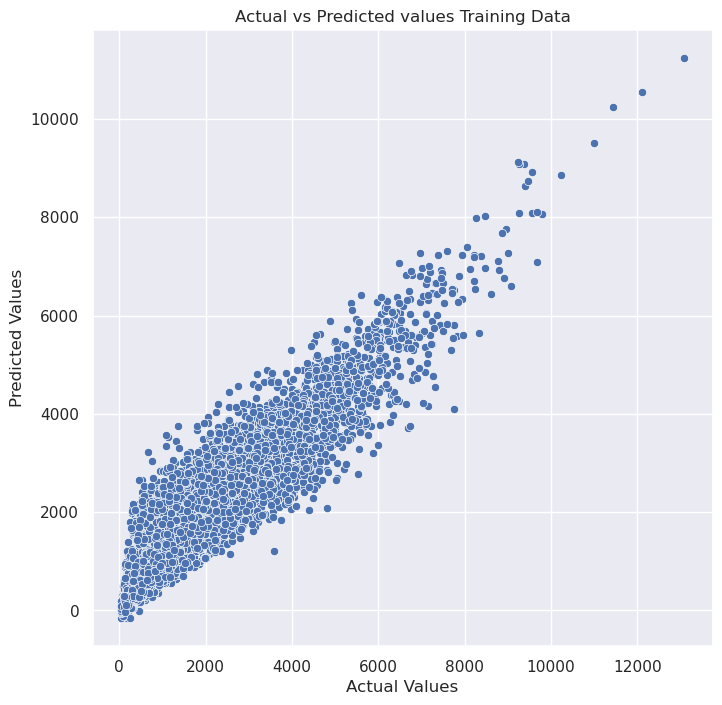

In [507]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_train, y = xgb_training_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Evaluation on Testing Data

In [508]:
print(f"R2 Score: {round(r2_score(Y_test, xgb_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, xgb_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, xgb_test_predictions), 2)}")

R2 Score: 0.56
MSE: 1278937.96
MAE: 792.66


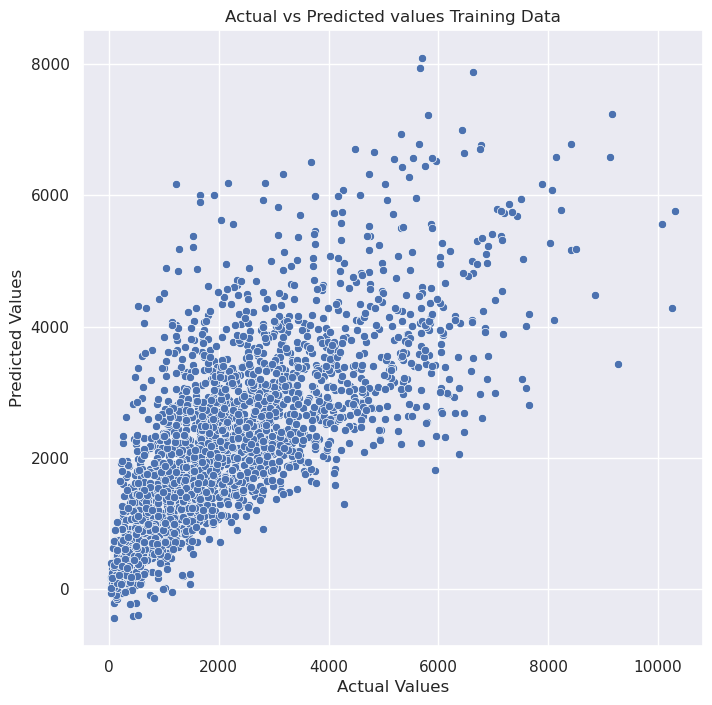

In [509]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_test, y = xgb_test_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Results

We build a model with XGBRegressor and evaluated the score.

The scores for both the training and test data are mentioned below:
| Parameters | Training Data | Test Data |
| --- | --- | --- |
| R2 Score | 0.85 | 0.56 |
| MSE | 449762.19 | 1278937.96 |
| MAE | 485.59 | 792.66 |

We see that our model is overfitted on training data, thus the scores dip for test data.
